## データの可視化について
## 散布図・バブルチャート編

2つの数値（時刻含む）を座標としてとらえたときのデータの偏りを調べる手法。  
2つ以上数値がある場合はX軸、Y軸をそれぞれ座標にとって、3つ目の数値がある場合は各点の大きさもしくは色の濃淡で数値の大小を表現することができる。


### データの取り込み

ボストン市郊外の地域別住宅価格（https://archive.ics.uci.edu/ml/machine-learning-databases/housing/ ）のデータを取り込む。  
なお本データの目的変数は"MEDV":住宅価格である。

In [1]:
from sklearn.datasets import load_boston
boston = load_boston() # データセットの読み込み

import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names) 
boston_df["MEDV"]=boston.target

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


### 散布図によるデータの可視化

#### pandas.DataFrame.plotを用いた場合

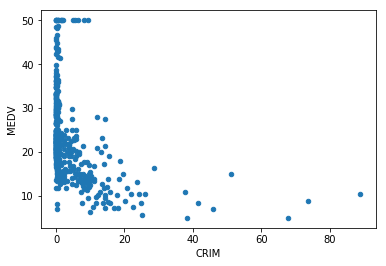

In [3]:
boston_df.plot.scatter(x='CRIM',y='MEDV')# 散布図をプロット(x軸,y軸の設定)

#### 点の大きさで3変数の関係を描画る場合(バブルチャート)

<Figure size 864x648 with 0 Axes>

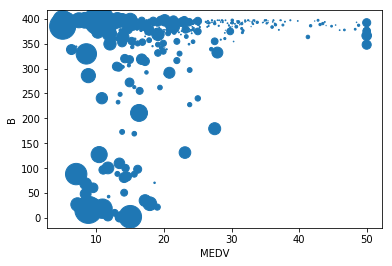

In [32]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 9))
area=boston_df['CRIM']*10 #10倍して'CRIM'を強調して表示する
boston_df.plot.scatter(x='MEDV',y='B',s=area)# 散布図をプロット(x軸,y軸の設定)

x軸にMEDV(1000ドルでの所有者居住住宅の中央値)をとり、y軸にB(街における黒人の割合),描画点の大きさは犯罪率の大きさを強調して表示した。  

#### 色の濃淡で3変数の関係を描画る場合

<Figure size 864x648 with 0 Axes>

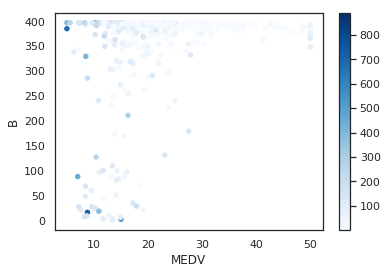

In [45]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 9))
area=boston_df['CRIM']*10 #10倍して'CRIM'を強調して表示する
boston_df.plot.scatter(x='MEDV',y='B',c=area,cmap='Blues')# 散布図をプロット(x軸,y軸の設定)

【参考】  
pandas.DataFrame.plot.scatterについて(公式):https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

#### matplotlibを用いた場合

/home/ec2-user/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


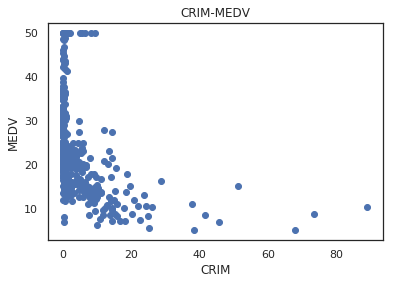

In [4]:
import matplotlib.pyplot as plt
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #描画位置の指定
ax.scatter(boston_df['CRIM'],boston_df['MEDV']) #x軸,y軸の設定
ax.set_title('CRIM-MEDV') # 図のタイトル
ax.set_xlabel('CRIM') # x軸のラベル
ax.set_ylabel('MEDV') # y軸のラベル

fig.show() # 図の表示



【参考】
- matplotlib.pyplot.scatterについて(公式):https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.scatter.html
- 散布図を複数描画したいとき:http://ailaby.com/matplotlib_fig/

#### 点の大きさで3変数の関係を描画る場合(バブルチャート)

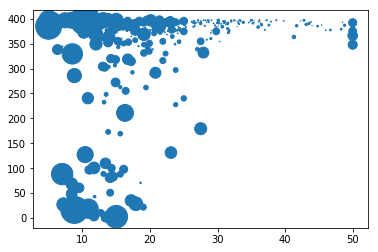

In [28]:
import matplotlib.pyplot as plt
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #描画位置の指定
ax.scatter(boston_df['MEDV'],boston_df['B'],s=boston_df['CRIM']*10)

#### 色の濃淡で3変数の関係を描画る場合

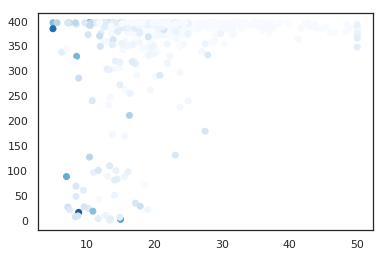

In [53]:
import matplotlib.pyplot as plt
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #描画位置の指定
ax.scatter(boston_df['MEDV'],boston_df['B'],c=boston_df['CRIM']*10,cmap='Blues')

#### seabornを用いた場合

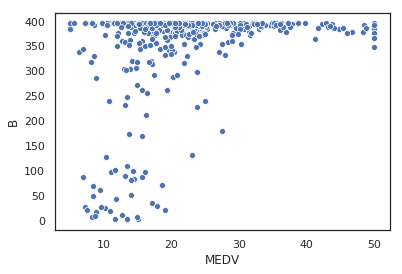

In [38]:
import seaborn as sns

# 背景を白に設定
sns.set(style="white", color_codes=True)

# グラフを出力(オプションの詳細は下記【参考】の"散布図の描画について"を参照のこと)
sns.scatterplot(x="MEDV", y="B",data=boston_df) #x軸,y軸の設定

【参考】  
- seaborn.scatterplotについて(公式):https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

#### 点の大きさで3変数の関係を描画る場合(バブルチャート)

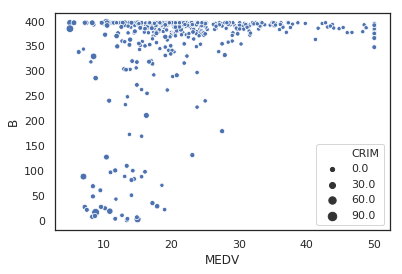

In [37]:
import seaborn as sns

# 背景を白に設定
sns.set(style="white", color_codes=True)
area=boston_df['CRIM'] 

# グラフを出力(オプションの詳細は下記【参考】の"散布図の描画について"を参照のこと)
sns.scatterplot(x="MEDV", y="B",size=area, data=boston_df) #x軸,y軸の設定

#### 色の濃淡で3変数の関係を描画る場合

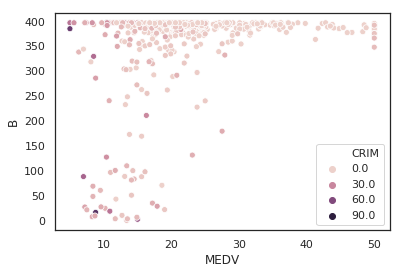

In [50]:
import seaborn as sns

# 背景を白に設定
sns.set(style="white", color_codes=True)
area=boston_df['CRIM'] 

# グラフを出力(オプションの詳細は下記【参考】の"散布図の描画について"を参照のこと)
sns.scatterplot(x="MEDV", y="B",hue=area, data=boston_df) #x軸,y軸の設定

##### 散布図とヒストグラムをまとめて描画する場合

/home/ec2-user/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


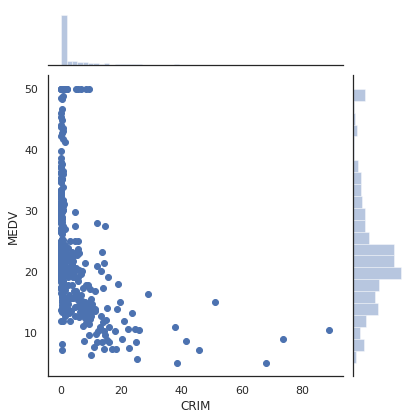

In [6]:
import seaborn as sns

# 背景を白に設定
sns.set(style="white", color_codes=True)

# グラフを出力(オプションの詳細は下記【参考】の"散布図の描画について"を参照のこと)
sns.jointplot(x="CRIM", y="MEDV", data=boston_df) #x軸,y軸の設定

【参考】  
- seaborn.scatterplotについて(公式):https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot

##### 散布図をヒートマップ的に描画する場合

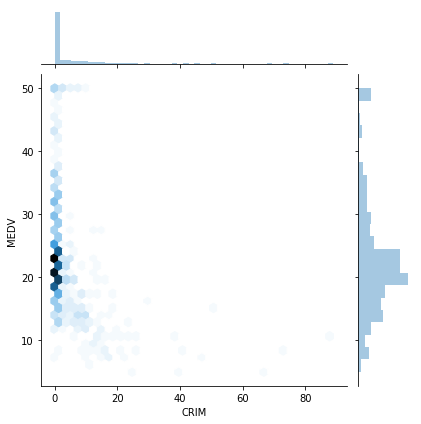

In [5]:
import seaborn as sns

#オプションの詳細は下記【参考】を参照のこと
sns.jointplot(x="CRIM", y="MEDV", data=boston_df, kind="hex") .set_axis_labels("CRIM", "MEDV") #x軸,y軸の設定

【参考】  
seabron.jointplotについて(公式):https://seaborn.pydata.org/generated/seaborn.jointplot.html

#### データに含まれるすべての数値変数同士の関係の可視化方法(ペアプロット)


ペアプロットでは、対角線上に単一変数の分布のヒストグラムを、それら以外の図は2つの変数間の関係を示した散布図を表示する。


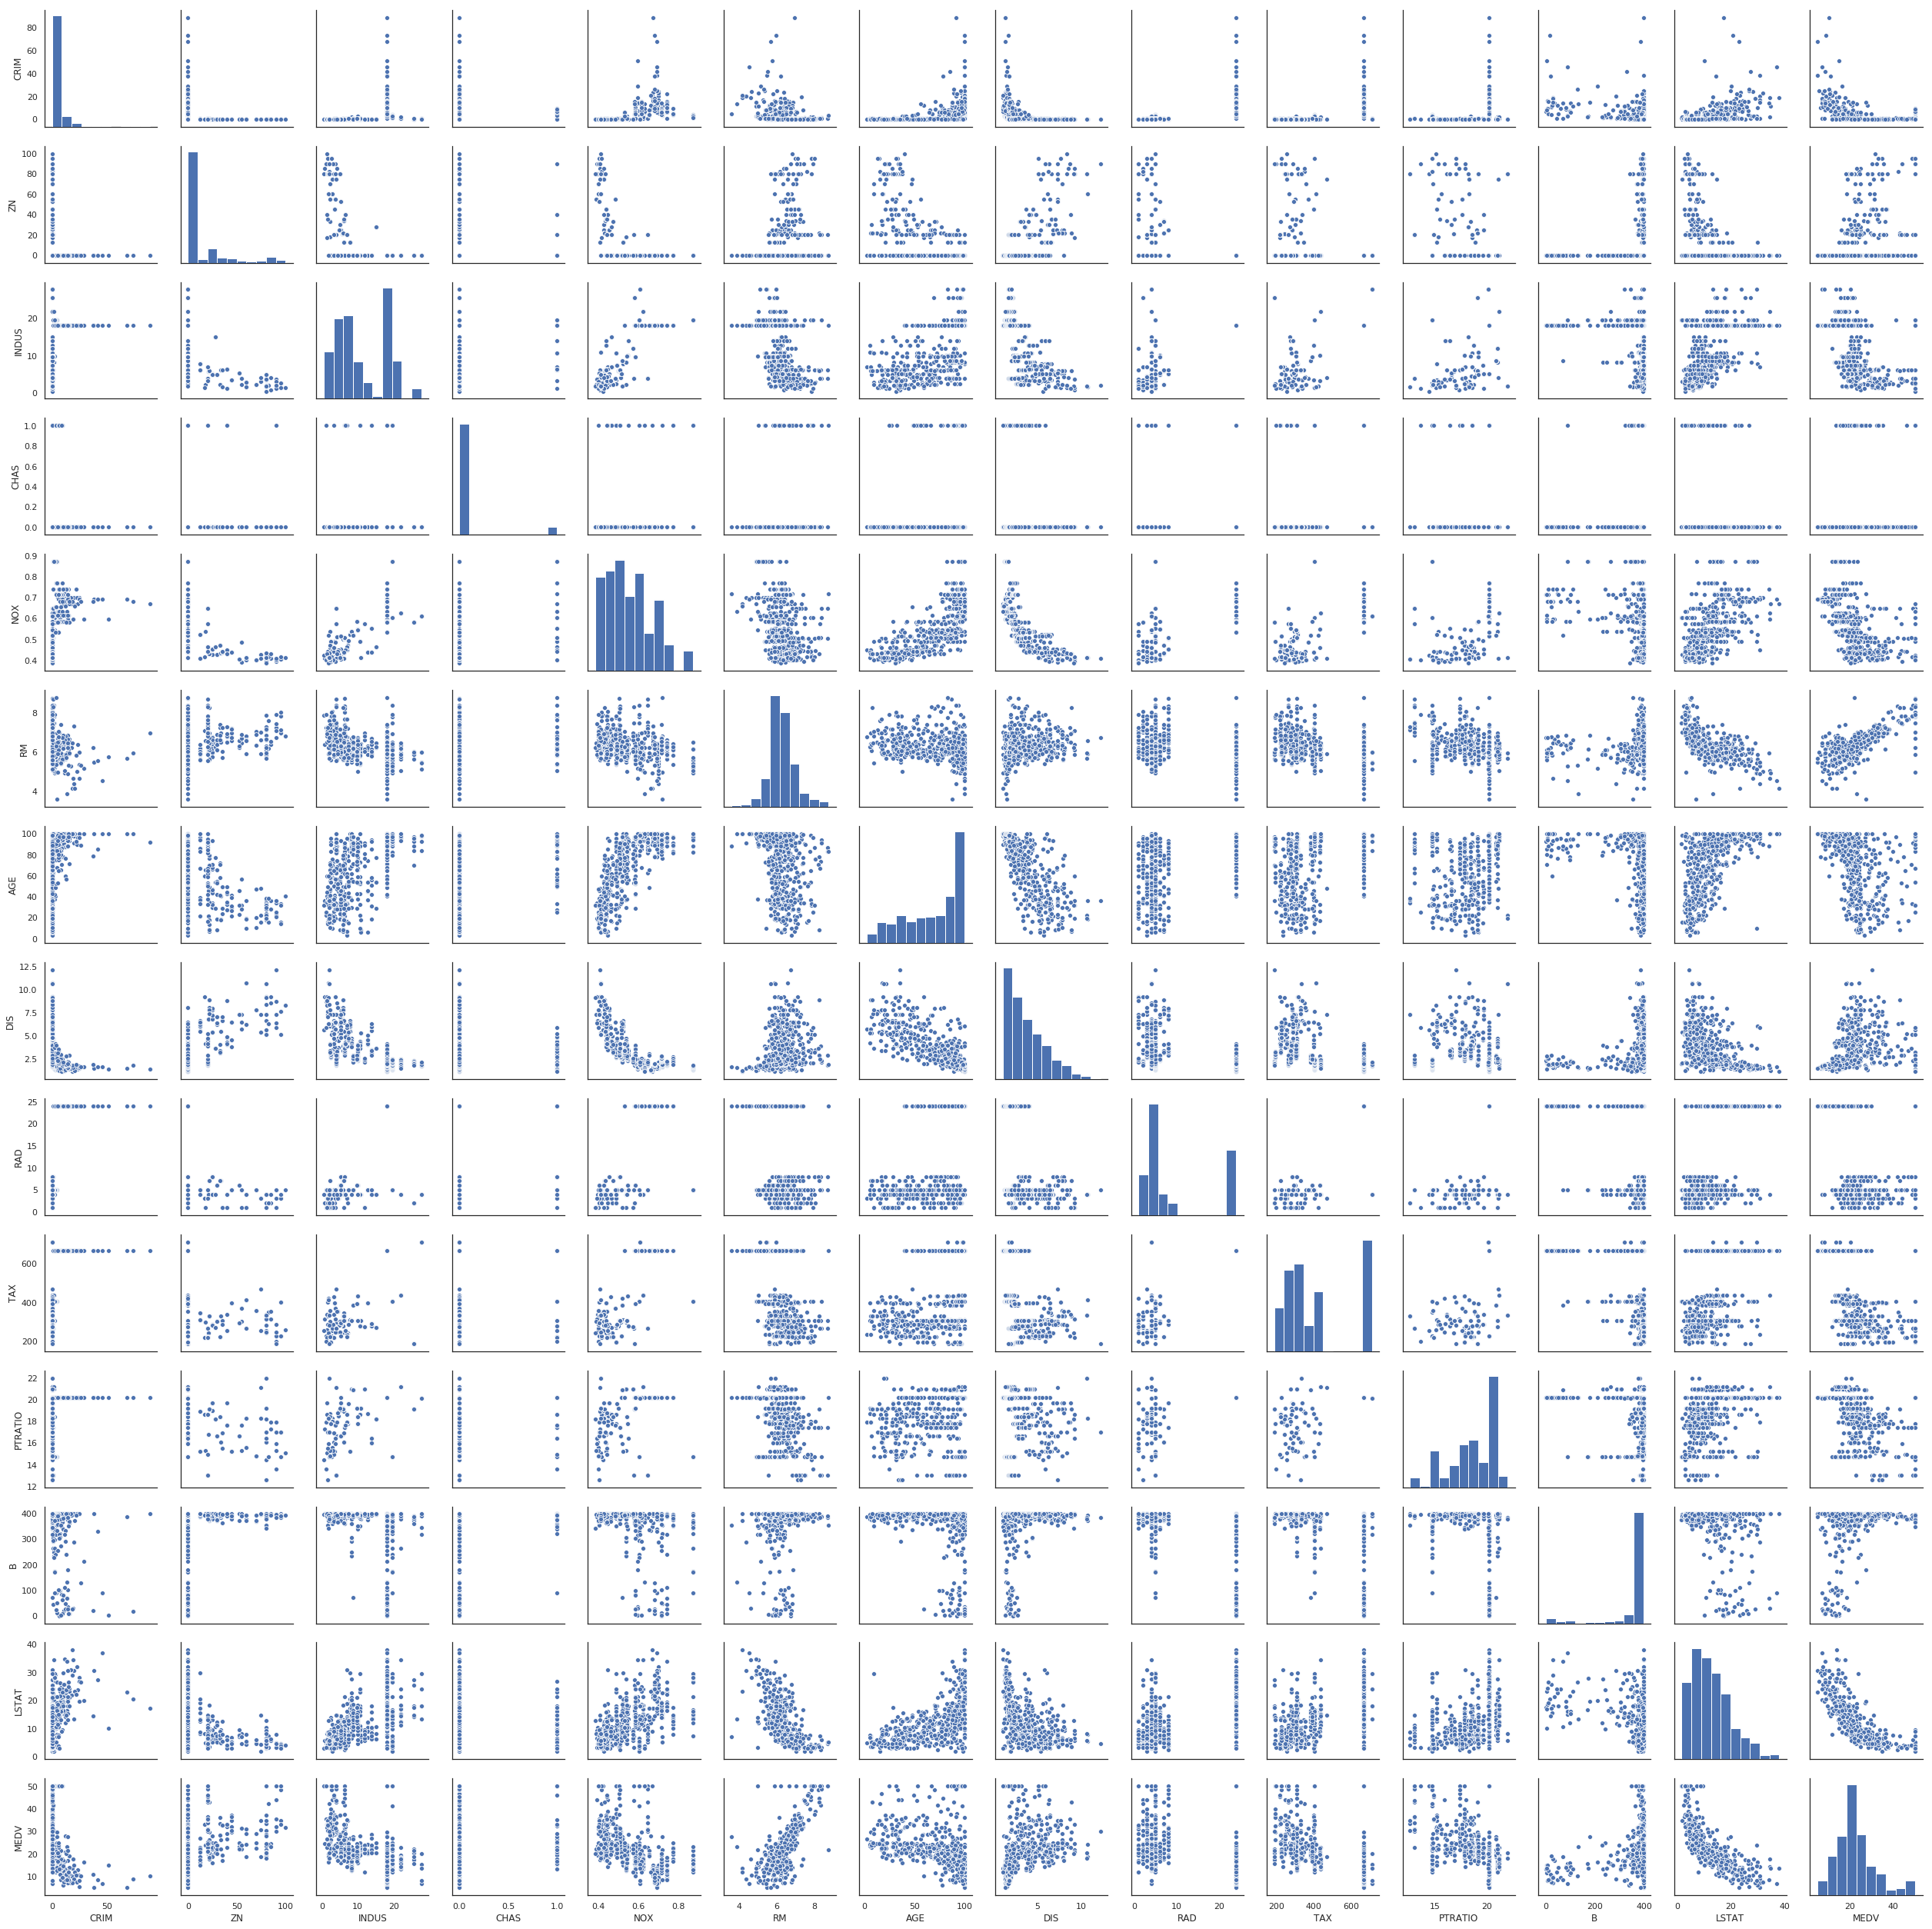

In [40]:
sns.pairplot(boston_df)

【参考】  
- ペアプロットについて(公式):https://seaborn.pydata.org/generated/seaborn.pairplot.html  
- ペアプロットについて(Qiita):https://qiita.com/saira/items/31328921ad0a4c203db4

#### 【補足】相関図に回帰モデルを描画する

https://pythondatascience.plavox.info/seaborn/%E6%95%A3%E5%B8%83%E5%9B%B3%E3%83%BB%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB

### 散布図描画後のデータの読み方について

散布図を用いてデータの分布を確認したのちに、データ間の関連性を調べる必要がある。  
その際に用いる用語を下記に定義する。

- 相関関係・・・2変数間の関係のこと
- 正の相関・・・一方の変数の増加につれて他方の変数も増加する場合
- 負の相関・・・一方の変数の増加が他方の変数の減少に対応する場合
- 相関係数・・・2変数間の相関の程度を示す指標のことである



相関係数rについての目安  
(統一的な基準は決まっていないが、おおよそ次の方に示した基準がよく用いられる)

|相関係数rの値|相関関係|
|---|---|
|$-1\leqq r \leqq -0.7 $|強い負の相関|
|$-0.7\leqq r \leqq -0.4 $|負の相関|
|$-0.4\leqq r \leqq -0.2 $|弱い負の相関|
|$-0.2\leqq r \leqq 0.2 $|ほとんど相関がない|
|$0.2\leqq r \leqq 0.4 $|弱い正の相関|
|$0.4\leqq r \leqq 0.7 $|正の相関|
|$0.7\leqq r \leqq 1 $|強い正の相関|



#### 2変数間の相関係数を求める方法

In [7]:
from scipy.stats import pearsonr

a, b = pearsonr(boston_df['CRIM'], boston_df['MEDV']) #2変数間の相関係数及びp値の出力
print("相関係数:", a)
print("p値:", b) #無相関と設定した場合のp値(2変数が相関があるかないかを判定してくれる。一般的にp値<0.05だと相関があると判断できる)


相関係数: -0.3858316898839905
p値: 2.0835501108141935e-19


#### 全変数間の相関係数をまとめて求める方法

In [30]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### 【補足】全変数間相関係数を見やすく表現する方法(ヒートマップ)

上記で得た全変数間相関係数はヒートマップを用いることで可視化することができる。  
ヒートマップに関しては別途"データ可視化_ヒートマップ.ipynb"にもまとめられているため、そちらも参照のこと。

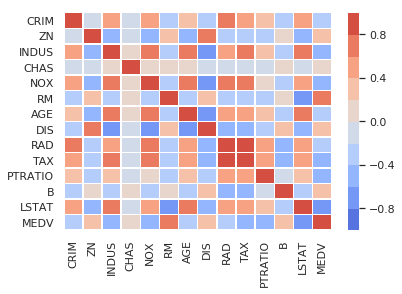

In [14]:
import seaborn as sns

#オプションの詳細は下記【参考】を参照のこと
sns.heatmap(boston_df.corr(),cmap= sns.color_palette('coolwarm', 10), annot=False,fmt='.2f', vmin = -1, vmax = 1, linewidths=.5)


【参考】  
- 相関係数の可視化について:https://qiita.com/Tom-tom-tom/items/f0e7800fbe72fd729a8d 
- seaborn.heatmapについて(公式):https://seaborn.pydata.org/generated/seaborn.heatmap.html

## 散布図を使用する際の注意事項

### 相関関係と因果関係

相関係数が高いことは、一般的には強い相関関係があるということであるが、このことは必ずしもその2つのデータの間に因果関係があるということではないことに注意する必要がある。

### 見かけ上の相関(疑似相関)について

#### 疑似相関とは  
因果関係のない２つの事象が、見えない要因によって因果関係があるかのように推測されること。  
疑似相関を見抜くためには、相関係数の数値だけで物事を判断するのではなく、その裏にどういった現象があるのかをしっかり考える必要がある。

#### 例
小学生を無作為に選んで、同じ学力試験を課し、さらに彼らの身長との関係を調べたとする。  
すると**背が高ければ高いほど、学力が高くなるというとてもはっきりしたデータが取れた。**  
このことから身長と学力に相関関係があるといえるだろうか？？

このデータの正しい解釈は、**学年が上がるにつれて(つまり年齢が高くなるにつれ)身長が高く、学力も高くなる**という解釈である。  
この調査では「学年」もしくは「年齢」という、影響を与える要素が入り込んでしまうため「背の高さが学力に影響を与えている」という結論は導けない。



【参考】  
疑似相関に関するより詳細な説明は下記ページを参照のこと  
疑似相関の事例と４つの見抜くポイント:
https://trickjp.info/2017/07/06/%E7%96%91%E4%BC%BC%E7%9B%B8%E9%96%A2%E3%81%AE%E4%BA%8B%E4%BE%8B%E3%81%A8%EF%BC%94%E3%81%A4%E3%81%AE%E8%A6%8B%E6%8A%9C%E3%81%8F%E3%83%9D%E3%82%A4%E3%83%B3%E3%83%88/  

見かけ上の相関を除いた相関係数(偏相関係数)について:
https://bellcurve.jp/statistics/course/9593.html




### 層別と相関

元のデータが性格が異なるいくつかの部分集団を含んでいる場合、全体では相関がないが、  
各グループでは相関が現れることがある。グループ分けは**層別**と呼ばれ、相関関係を調べる上ではあらかじめ注意しなければならない。

(-0.5, 1537.5, 1248.5, -0.5)

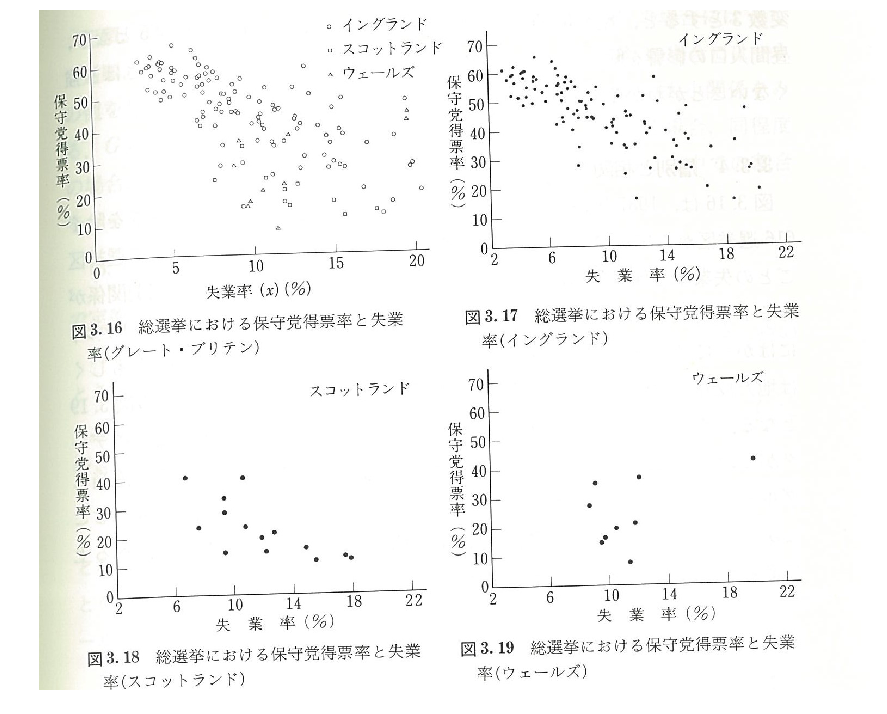

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15, 15)) 
img = mpimg.imread('./input/scatter.jpg')
plt.imshow(img)
plt.axis("off")

**1987年総選挙における英国保守党得票率と失業率の散布図(図3.16 -図3.19)**  
図3.16をみると失業率と保守党得票率は弱く相関しているが、三つの地域に「層別」すると、相関の強い地域がある(イングランド、スコットランド)。  
失業率は日本の基準からみるとどの選挙区も高いが、それが保守党得票率に直接響き、政策と投票が直結していることがわかる。  
(出典:「統計学入門」東京大学教養学部統計学教室編 P53)  
(元データ:Butler, D. and Kavanagh, D.(1988) The British General Election of 1987 :Macmillan Press,Londonより作成)



【参考】  
「統計学入門」東京大学教養学部統計学教室編